In [1]:
import numpy as np
import pandas as pd

#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D,GlobalMaxPool1D, MaxPool2D, Dense, Activation, Embedding, Input
from tensorflow.keras.layers import ReLU, Flatten
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('cleaned_data.csv', index_col=0)
test = pd.read_csv('cleaned_data_test.csv', index_col=0)

# Combine the features Title and Abstract into one
df['News'] = df['Title'].str.cat(df['Abstract'],sep=" ")
test['News'] = test['Title'].str.cat(test['Abstract'],sep=" ")

# Drop all rows that contain NaN under those columns
df.dropna(subset = ["News"], inplace=True)
test.dropna(subset = ["News"], inplace=True)
print('Length of the training dataset ', len(df))
df.head()

Length of the training dataset  77077


,NewID,Category,Title,Abstract,News
0,N88753,lifestyle,brands queen elizabeth prince charles prince p...,shop notebooks jacket royal ca nt live without,brands queen elizabeth prince charles prince p...
1,N45436,news,walmart slash price lastgeneration ipad,apple new ipad release bring big deal last yea...,walmart slash price lastgeneration ipad apple ...
2,N23144,health,bad habit belly fat,seemingly harmless habit hold back keep shed u...,bad habit belly fat seemingly harmless habit ...
4,N93187,news,cost trumps aid freeze trench ukraines war,lt ivan molchanet peek parapet sand bag front ...,cost trumps aid freeze trench ukraines war lt ...
5,N75236,health,nba wife here affect mental health,feel like fraud nba wife did nt help fact near...,nba wife here affect mental health feel like f...


,NewID,Category,Title,Abstract,News,clean-News
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","The Brands Queen Elizabeth, Prince Charles, an...","the brands queen elizabeth, prince charles, an..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,Walmart Slashes Prices on Last-Generation iPad...,walmart slashes prices on last-generation ipad...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,50 Worst Habits For Belly Fat These seemingly ...,50 worst habits for belly fat these seemingly ...
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,The Cost of Trump's Aid Freeze in the Trenches...,the cost of trump's aid freeze in the trenches...
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",I Was An NBA Wife. Here's How It Affected My M...,i was an nba wife. here's how it affected my m...


In [5]:
train_x_clean_news = df['News'].values
test_x_clean_news = test['News'].values
x_fit=np.concatenate((train_x_clean_new,test_x_clean_news))

clean_news_vectorize = CountVectorizer()
clean_news_vectorize.fit(x_fit)

#tf train matrix
train_x_clean_news_tf = clean_news_vectorize.transform(train_x_clean_news)
print(train_x_clean_news_tf.shape)

tfidf_transformer = TfidfVectorizer()
tfidf_transformer.fit(x_fit)

#tf-idf train matrix
train_x_clean_news_tfidf = tfidf_transformer.transform(train_x_clean_news)
print(train_x_clean_news_tfidf.shape)

(77077, 77983)
(77077, 77983)


In [6]:
#tf test matrix
test_x_clean_news_tf = clean_news_vectorize.transform(test_x_clean_news)
print(test_x_clean_news_tf.shape)

#tf-idf test matrix
test_x_clean_news_tfidf = tfidf_transformer.transform(test_x_clean_news)
print(test_x_clean_news_tfidf.shape)

(19007, 77983)
(19007, 77983)


In [7]:
y_train = df['Category'].values
y_test = test['Category'].values
y_fit=np.concatenate((y_train,y_test))
encoder = LabelEncoder()
encoder.fit(y_fit)

encoded_Y = encoder.transform(y_train)
y_train = to_categorical(encoded_Y)
print(y_train.shape)

(77077, 18)


In [8]:
test_encoded_Y = encoder.transform(y_test)
y_test = to_categorical(test_encoded_Y)
print(y_test.shape)

(19007, 18)


In [9]:
tf_model = Sequential()
tf_model.add(Dense(128, input_shape=(train_x_clean_news_tf.shape[1],), activation='relu'))
tf_model.add(Dense(18, activation='softmax'))
# Compile model
tf_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

tf_model.fit(train_x_clean_news_tf,y_train, epochs=10, verbose=2)

Epoch 1/10
2409/2409 - 449s - loss: 0.8812 - accuracy: 0.7355 - 449s/epoch - 186ms/step
Epoch 2/10
2409/2409 - 514s - loss: 0.3579 - accuracy: 0.8812 - 514s/epoch - 214ms/step
Epoch 3/10
2409/2409 - 488s - loss: 0.1503 - accuracy: 0.9527 - 488s/epoch - 203ms/step
Epoch 4/10
2409/2409 - 456s - loss: 0.0702 - accuracy: 0.9810 - 456s/epoch - 189ms/step
Epoch 5/10
2409/2409 - 505s - loss: 0.0439 - accuracy: 0.9893 - 505s/epoch - 210ms/step
Epoch 6/10
2409/2409 - 471s - loss: 0.0325 - accuracy: 0.9927 - 471s/epoch - 196ms/step
Epoch 7/10
2409/2409 - 415s - loss: 0.0271 - accuracy: 0.9942 - 415s/epoch - 172ms/step
Epoch 8/10
2409/2409 - 473s - loss: 0.0247 - accuracy: 0.9946 - 473s/epoch - 196ms/step
Epoch 9/10
2409/2409 - 482s - loss: 0.0205 - accuracy: 0.9953 - 482s/epoch - 200ms/step
Epoch 10/10
2409/2409 - 485s - loss: 0.0196 - accuracy: 0.9955 - 485s/epoch - 201ms/step


In [10]:
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9981952   
                                                                 
 dense_1 (Dense)             (None, 18)                2322      
                                                                 
Total params: 9984274 (38.09 MB)
Trainable params: 9984274 (38.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix

predicted_tf=tf_model.predict(test_x_clean_news_tf)

print(metrics.classification_report(np.argmax(y_test,axis=-1), np.argmax(predicted_tf,axis=-1),target_names=None))

594/594 [==============================] - 6s 1ms/step
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       436
           1       0.51      0.34      0.41       111
           2       0.57      0.55      0.56      1063
           3       0.76      0.69      0.72       731
           5       0.57      0.55      0.56       417
           6       0.00      0.00      0.00        16
           7       0.33      0.40      0.36       587
           9       0.70      0.41      0.52       127
          10       0.77      0.62      0.69       278
          11       0.70      0.77      0.73      6075
          12       0.00      0.00      0.00         1
          13       0.93      0.95      0.94      6087
          14       0.45      0.40      0.42       951
          15       0.52      0.41      0.45       227
          16       0.51      0.38      0.44      1086
          17       0.76      0.67      0.71       814

    accuracy             

C:\Users\RATHOD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RATHOD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RATHOD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['sports' 'news' 'sports' ... 'sports' 'finance' 'sports']


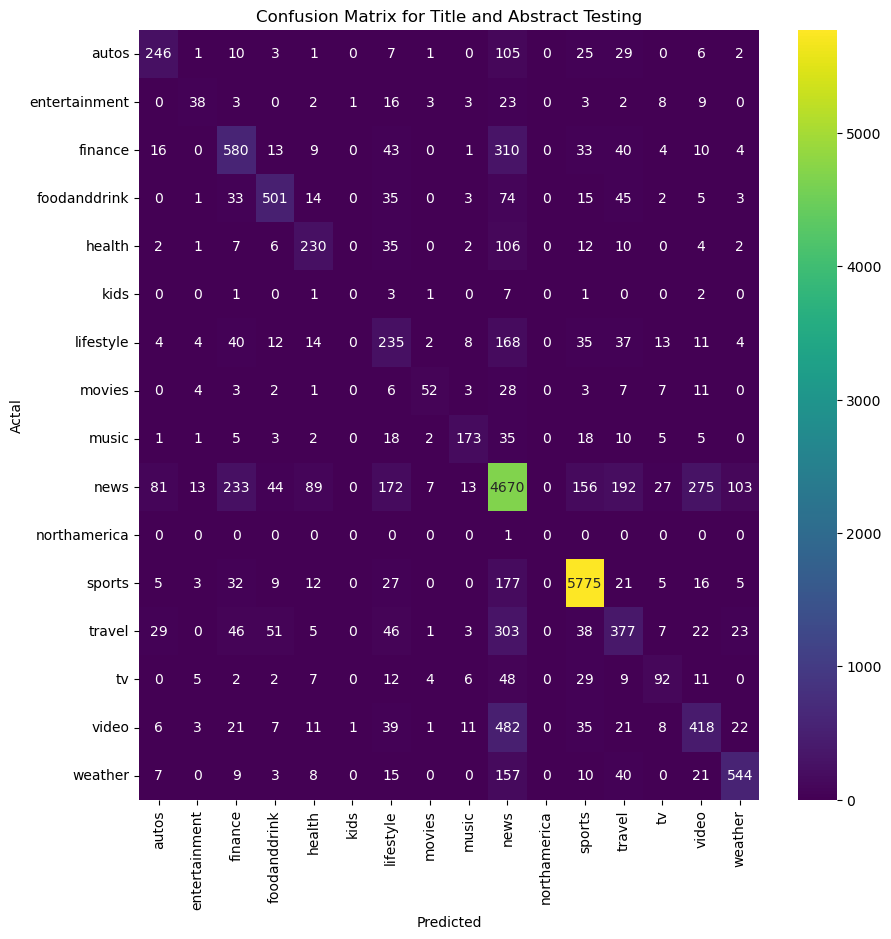

In [12]:
#label=np.unique(y_fit)
label=np.unique(encoder.inverse_transform(test_encoded_Y))
#test['Category'].unique()
print(encoder.inverse_transform(test_encoded_Y))
import matplotlib.pyplot as plt
#import product
import seaborn as sns

c_m = confusion_matrix(np.argmax(y_test,axis=-1), np.argmax(predicted_tf,axis=-1),labels=np.unique(test_encoded_Y))

#Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(c_m, label, label), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix for Title and Abstract Testing')
plt.ylabel('Actal')
plt.xlabel('Predicted')
plt.show()

In [13]:
tf_model2 = Sequential()
tf_model2.add(Dense(64, input_shape=(train_x_clean_news_tf.shape[1],), activation='relu'))
tf_model2.add(Dense(64, activation='relu'))
tf_model2.add(Dense(18, activation='softmax'))
# Compile model
tf_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

tf_model2.fit(train_x_clean_news_tf,y_train,epochs=10, verbose=2)

Epoch 1/10
2409/2409 - 235s - loss: 0.8945 - accuracy: 0.7291 - 235s/epoch - 97ms/step
Epoch 2/10
2409/2409 - 240s - loss: 0.3889 - accuracy: 0.8695 - 240s/epoch - 100ms/step
Epoch 3/10
2409/2409 - 250s - loss: 0.1720 - accuracy: 0.9429 - 250s/epoch - 104ms/step
Epoch 4/10
2409/2409 - 239s - loss: 0.0830 - accuracy: 0.9736 - 239s/epoch - 99ms/step
Epoch 5/10
2409/2409 - 254s - loss: 0.0495 - accuracy: 0.9853 - 254s/epoch - 105ms/step
Epoch 6/10
2409/2409 - 242s - loss: 0.0350 - accuracy: 0.9908 - 242s/epoch - 101ms/step
Epoch 7/10
2409/2409 - 259s - loss: 0.0284 - accuracy: 0.9923 - 259s/epoch - 108ms/step
Epoch 8/10
2409/2409 - 217s - loss: 0.0240 - accuracy: 0.9934 - 217s/epoch - 90ms/step
Epoch 9/10
2409/2409 - 269s - loss: 0.0195 - accuracy: 0.9946 - 269s/epoch - 112ms/step
Epoch 10/10
2409/2409 - 263s - loss: 0.0180 - accuracy: 0.9944 - 263s/epoch - 109ms/step


In [14]:
print(tf_model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                4990976   
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 18)                1170      
                                                                 
Total params: 4996306 (19.06 MB)
Trainable params: 4996306 (19.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [15]:
# evaluate
loss, acc = tf_model2.evaluate(test_x_clean_news_tf, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))


predicted_tf2=tf_model2.predict(test_x_clean_news_tf)

print(metrics.classification_report(np.argmax(y_test,axis=-1), np.argmax(predicted_tf2,axis=-1),target_names=None))

Test Accuracy: 72.420686
594/594 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       436
           1       0.51      0.43      0.47       111
           2       0.56      0.47      0.51      1063
           3       0.73      0.70      0.71       731
           5       0.59      0.53      0.56       417
           6       0.17      0.06      0.09        16
           7       0.36      0.34      0.35       587
           9       0.52      0.45      0.48       127
          10       0.73      0.60      0.66       278
          11       0.70      0.75      0.72      6075
          12       0.00      0.00      0.00         1
          13       0.92      0.95      0.94      6087
          14       0.43      0.35      0.38       951
          15       0.37      0.39      0.38       227
          16       0.48      0.45      0.46      1086
          17       0.69      0.69      0.69       814



C:\Users\RATHOD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RATHOD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RATHOD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
